In [47]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Checking accuracy in decision tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
    
#Reading CSV files
train = pd.read_csv('1 - Initial data/training_set_features.csv', index_col = 'respondent_id')
labels = pd.read_csv('1 - Initial data/training_set_labels.csv', index_col='respondent_id')

#Joining training labels to the training dataset
train = train.join(labels)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [48]:
#Dropping columns with most null values
df = train.drop(['employment_industry', 'employment_occupation'], axis=1)
df['health_insurance'] = df['health_insurance'].fillna(-1)

#Function that drops unecessary columns for H1N1 analysis
def drop_H1N1(df):
    #Fields not important to evaluare H1N1
    df = df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)

    #Dropping because of one hot encolding
    df = df.drop(['hhs_geo_region'], axis=1)
    
    return df

#Function that drops unecessary columns for seasonal analysis
def drop_seasonal(df):
    #Fields not important to evaluare H1N1
    df = df.drop(['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_concern', 'h1n1_knowledge', 'health_insurance', 'census_msa'], axis=1)

    #Dropping because of one hot encolding
    df = df.drop(['hhs_geo_region'], axis=1)
    
    return df

df_H1N1 = drop_H1N1(df)
df_seasonal = drop_seasonal(df)

In [49]:
#Showing total of null values
#df.isnull().sum(axis = 0)
df_H1N1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

In [50]:
#Dropping null values
#df = df.dropna()
#Delete rows with more than 1 NA value
#test2 = test[test.isnull().sum(axis=1) < 2]
#df.info()

#Function to clean dataset
def cleaning_dataset(df):
    df = df.dropna()
    
    return df

df_H1N1 = cleaning_dataset(df_H1N1)
df_seasonal = cleaning_dataset(df_seasonal)

In [51]:
df_H1N1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19656 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19656 non-null  float64
 1   h1n1_knowledge               19656 non-null  float64
 2   behavioral_antiviral_meds    19656 non-null  float64
 3   behavioral_avoidance         19656 non-null  float64
 4   behavioral_face_mask         19656 non-null  float64
 5   behavioral_wash_hands        19656 non-null  float64
 6   behavioral_large_gatherings  19656 non-null  float64
 7   behavioral_outside_home      19656 non-null  float64
 8   behavioral_touch_face        19656 non-null  float64
 9   doctor_recc_h1n1             19656 non-null  float64
 10  chronic_med_condition        19656 non-null  float64
 11  child_under_6_months         19656 non-null  float64
 12  health_worker                19656 non-null  float64
 13  health_insurance

In [52]:
#Function to split dataset in training and test. Generates CSV file as result
def final_dataset(df, y, name):
    x = df
    train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
    
    if name == 'h1n1':
        drop_name = 'seasonal'
    else:
        drop_name = 'h1n1'
        
    #Creating preprocessed csv
    df_train_h1n1 = train_x.drop(drop_name + '_vaccine', axis=1)
    df_train_h1n1.to_csv('2 - PreProcessed data/' + name + '_training.csv', index=False)

    #Creating preprocessed test csv
    df_test_h1n1 = val_x.drop(drop_name + '_vaccine', axis=1)
    df_test_h1n1.to_csv('2 - PreProcessed data/'+ name + '_test.csv', index=False)

In [53]:
final_dataset(df_H1N1, df_H1N1.h1n1_vaccine, 'h1n1')
final_dataset(df_seasonal, df_seasonal.seasonal_vaccine, 'seasonal')

In [54]:
#Transforming categorical data in numeric data
def transform_categorical(df):
    from sklearn.preprocessing import OneHotEncoder

    #Cols
    object_cols = [col for col in df.columns if df[col].dtype == "object"]

    # Columns that will be one-hot encoded
    low_cardinality_cols = [col for col in object_cols if df[col].nunique() < 10]

    # Columns that will be dropped from the dataset
    high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

    print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
    print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)


    # Apply one-hot encoder to each column with categorical data
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df[low_cardinality_cols]))

    # One-hot encoding removed index; put it back
    OH_cols_train.index = df.index


    # Remove categorical columns (will replace with one-hot encoding)
    num_X_train = df.drop(object_cols, axis=1)

    # Add one-hot encoded columns to numerical features
    OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

    df = OH_X_train
    
    return df

df_H1N1 = transform_categorical(df_H1N1)
df_seasonal = transform_categorical(df_seasonal)

Categorical columns that will be one-hot encoded: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

Categorical columns that will be dropped from the dataset: []
Categorical columns that will be one-hot encoded: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

Categorical columns that will be dropped from the dataset: []


In [55]:
#Seeting plot environmnet
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

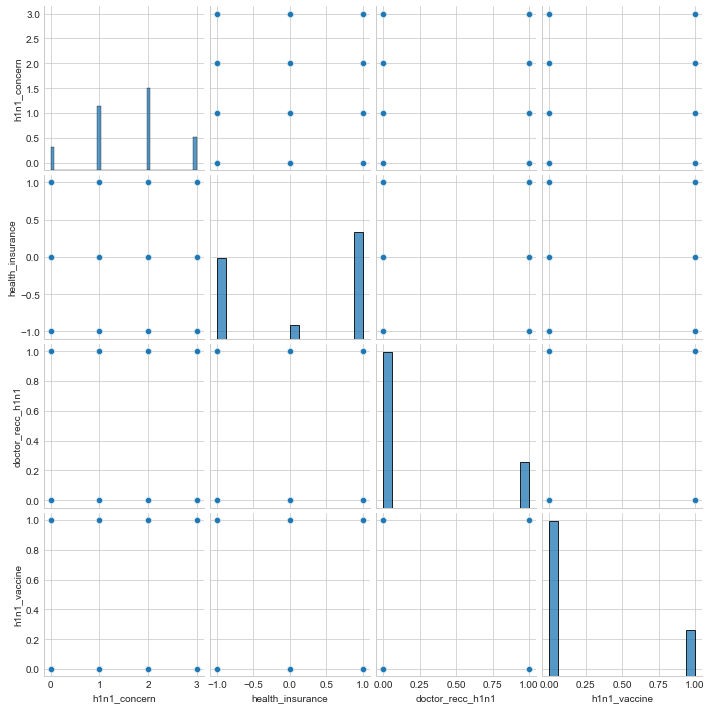

In [56]:
#Plotting variables
df_plot = df_H1N1[['h1n1_concern', 'health_insurance', 'doctor_recc_h1n1','h1n1_vaccine']]
sb.pairplot(df_plot)



 1.0    10415
-1.0     7854
 0.0     1387
Name: health_insurance, dtype: int64

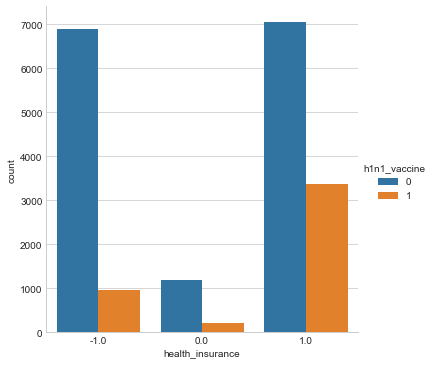

In [57]:
sb.catplot(x="health_insurance", kind="count", hue="h1n1_vaccine", data=df_plot)

payment = df_plot.health_insurance
payment.value_counts()

MAE: 0.15466015466015465
Accuracy: 0.8453398453398453


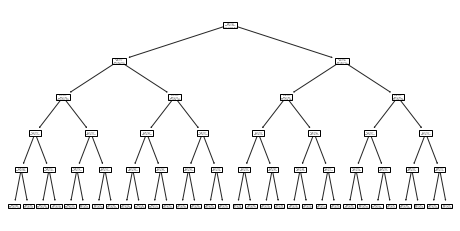

In [58]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

def decisionTree(df):
    x = df.drop(['seasonal_vaccine','h1n1_vaccine'], axis=1)
    y = df.h1n1_vaccine

    train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
    
    """
    parameters = {'max_depth':range(3,20)}
    clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
    clf = clf.fit(X=x, y=y)
    tree_model = clf.best_estimator_
    #print (clf.best_score_, clf.best_params_) 
    
    val_predictions = clf.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_predictions)
    print(val_mae)
    print(accuracy_score(list(val_y), list(map(int,list(val_predictions)))))
    tree.plot_tree(clf)
    """
    
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 5)
    clf = clf.fit(x, y)
    
    val_predictions = clf.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_predictions)
    print("MAE:", val_mae)
    print("Accuracy:", accuracy_score(list(val_y), list(map(int,list(val_predictions)))))

    """
    train_y["prediction"] = val_predictions
    train_y["real"] = val_y
    """
    tree.plot_tree(clf)
    
decisionTree(df_H1N1)